# Problem Analysis Workshop 3
**Team Members:**
1. Erica Holden, 5490685
2. Yu-Chen Chou (Tracy), 9006160
3. Reham Omar Hussein Abuarqoub, 9062922

In this Problem Analysis Problem Analysis Workshop  we will use the dataset that we used in Group Presentaion 2 (Heart.csv)

## Why Clustering Matters  
Clustering helps us group patients based on similar features like age, cholesterol, and heart rate. This segmentation helps in identifying patterns and risk categories without using target labels. It is especially useful in medical applications for predicting outcomes and planning patient care.

## Import libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

## Load the dataset

In [33]:
#load the dataset
df = pd.read_csv("heart.csv")  # Ensure heart.csv is in the same folder as your notebook

print("First 5 rows of the dataset:")
print(df.head())
print("\nMissing values:")
print(df.isnull().sum())
print("\nData types:")
print(df.dtypes)

First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs          

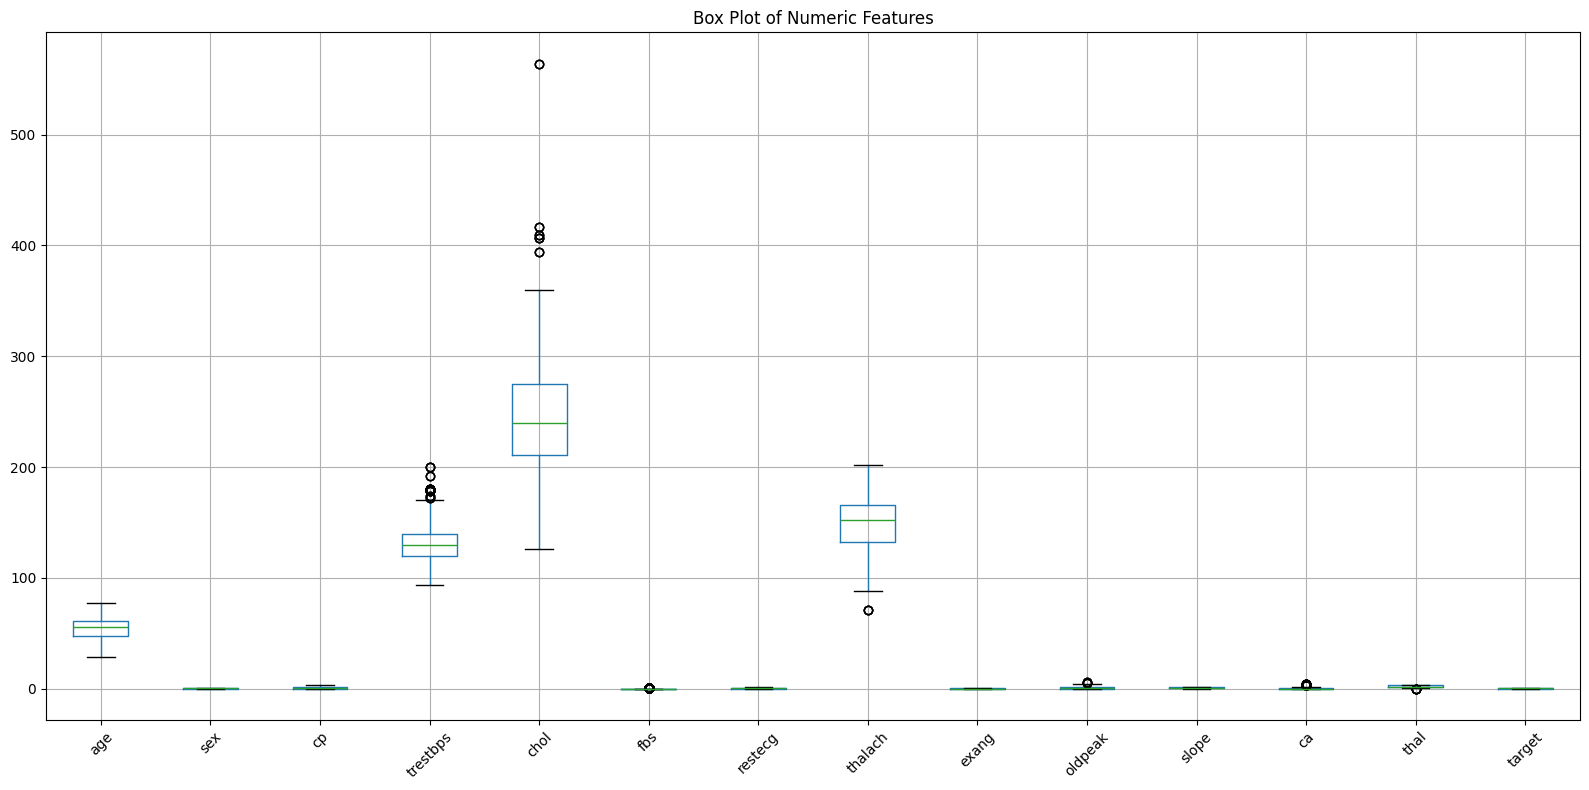

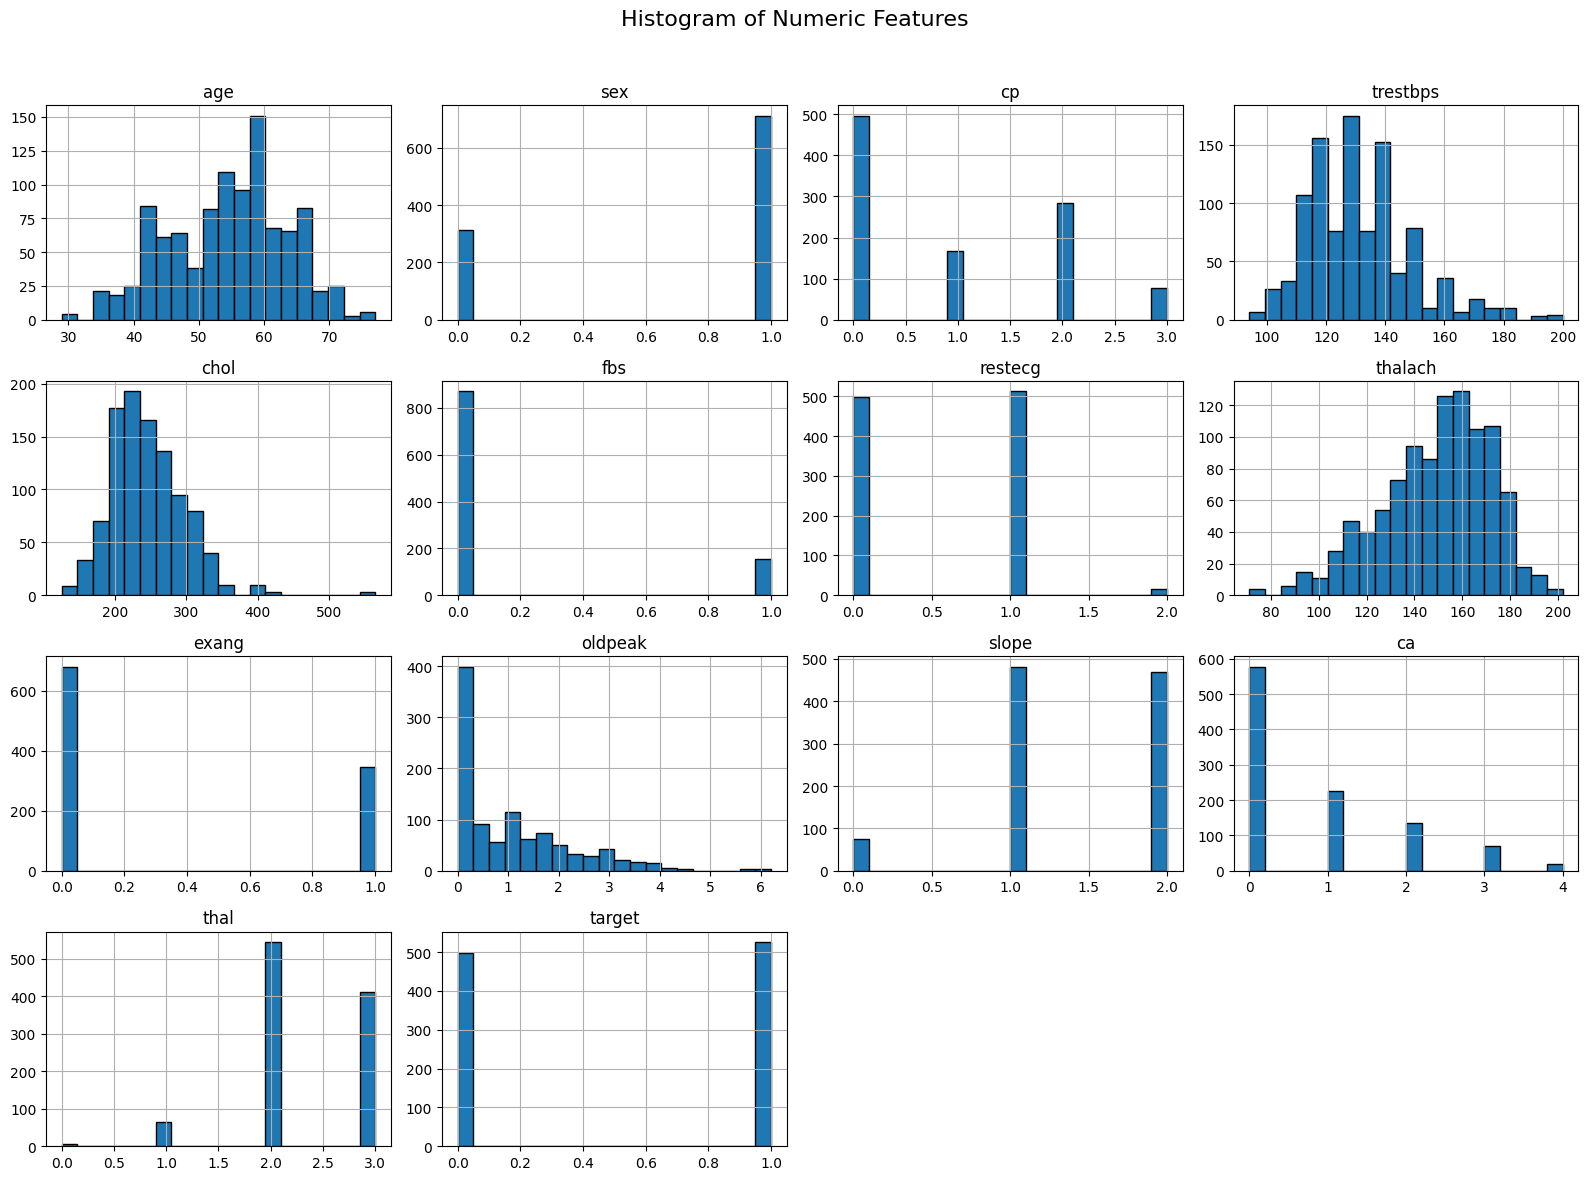

In [34]:
# Select numeric features, excluding clustering and PCA columns if they exist
exclude_cols = [col for col in ['cluster', 'pca1', 'pca2'] if col in df.columns]
numeric_features = df.select_dtypes(include=[np.number]).columns.drop(exclude_cols)

# Box plots for numeric features
plt.figure(figsize=(16, 8))
df[numeric_features].boxplot()
plt.title("Box Plot of Numeric Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histograms for numeric features
df[numeric_features].hist(figsize=(16, 12), bins=20, edgecolor='black')
plt.suptitle("Histogram of Numeric Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Preprocessing

In [35]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns=["target"]))  # Exclude target from clustering


## Elbow Method and Silhouette Score

In [36]:
inertia = []
sil_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(scaled_data, kmeans.labels_))

## Plotting Elbow and Silhouette Score

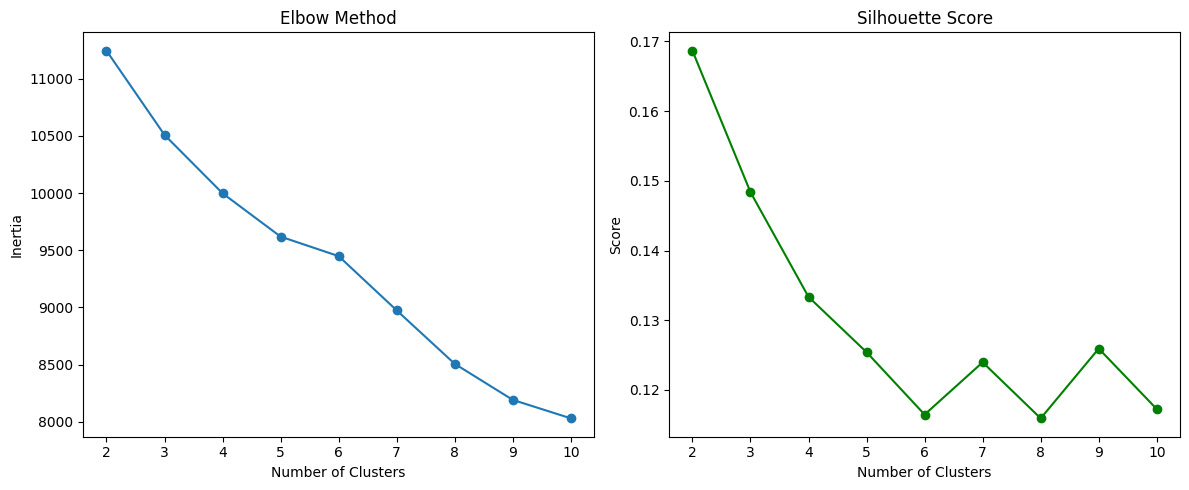

In [37]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(K, sil_scores, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")

plt.tight_layout()
plt.show()


From the Elbow Method figure, the best bend of the elbow is near K=4 or K=5.
   From the Silhouette Score figure, the best silhouette score is K=2 (approximately 0.168), the second is K=3 (approximately 0.148).
   Finally, we choose a reasonable compromise, K=3, to perform K-Means Clustering.


## Apply K-Means Clustering (Choose k=3 based on elbow/silhouette)

## Why Clustering Matters ?
Clustering helps identify groups of patients with similar health characteristics such as age, cholesterol, and blood pressure. 
This is useful in healthcare when labels are missing or unclear. It enables pattern discovery and allows for early intervention 
based on patient similarities found through unsupervised learning methods like K-Means.


In [38]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

## Visualize Clusters using PCA

In [39]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]


## K-Means Interpretation
The K-Means model divided the patients into three clusters. Cluster 0 had older patients with high cholesterol. 
Cluster 1 contained younger, healthier individuals. Cluster 2 showed a mix of moderate risk factors. 
These insights help in segmenting populations for more focused and proactive healthcare planning.


## Scatter plot

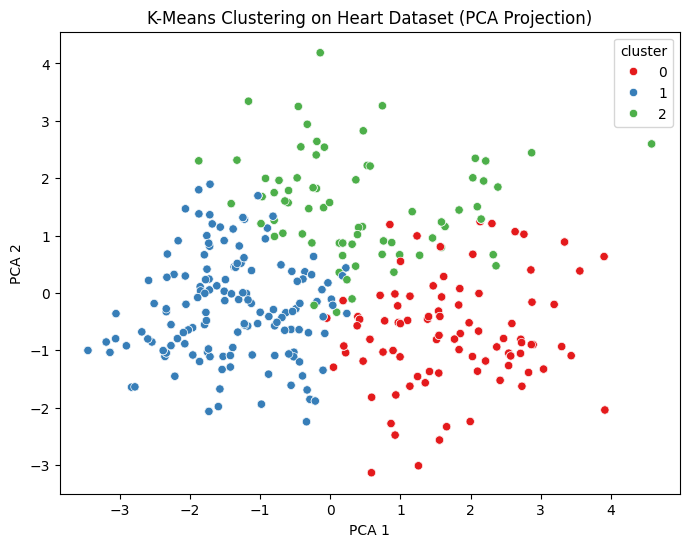

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set1')
plt.title("K-Means Clustering on Heart Dataset (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()



Cluster 0 (red): Patients with symptoms but relatively low risk of heart disease (perhaps due to symptoms from other causes or mild heart disease). Here age=57.320635, target= 0.120635.
Cluster 1 (blue): Young patients who appear healthy but are at high risk of heart disease (perhaps occult or exercise-triggered heart disease). Here age=49.308824, target= 0.762605.
Cluster 2 (green): Elderly patients with multiple high-risk factors and moderate risk of heart disease. Here age=60.974359, target= 0.534188.

based on the dataset, *Target  1 means they have heart disease*
*Target  0 means they don't have heart disease*

## cluster_summary = df.groupby('cluster').mean()


In [41]:
cluster_summary = df.groupby('cluster').mean()
print("Cluster Summary (Mean of Each Feature per Cluster):")
print(cluster_summary)
df.groupby('cluster').mean()



Cluster Summary (Mean of Each Feature per Cluster):
               age       sex        cp    trestbps        chol       fbs  \
cluster                                                                    
0        57.320635  0.857143  0.200000  129.323810  248.774603  0.098413   
1        49.308824  0.686975  1.178571  125.138655  235.491597  0.037815   
2        60.974359  0.495726  1.461538  147.858974  263.641026  0.444444   

          restecg     thalach     exang   oldpeak     slope        ca  \
cluster                                                                 
0        0.441270  129.431746  0.800000  1.830794  1.050794  1.193651   
1        0.644958  163.663866  0.094538  0.448529  1.691176  0.411765   
2        0.414530  146.012821  0.205128  1.316667  1.213675  0.858974   

             thal    target      pca1      pca2  
cluster                                          
0        2.631746  0.120635  1.737530 -0.707030  
1        2.218487  0.762605 -1.374420 -0.289346  
2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pca1,pca2
cluster,,,,,,,,,,,,,,,,
0,57.320635,0.857143,0.200000,129.323810,248.774603,0.098413,0.441270,129.431746,0.800000,1.830794,1.050794,1.193651,2.631746,0.120635,1.737530,-0.707030
1,49.308824,0.686975,1.178571,125.138655,235.491597,0.037815,0.644958,163.663866,0.094538,0.448529,1.691176,0.411765,2.218487,0.762605,-1.374420,-0.289346
2,60.974359,0.495726,1.461538,147.858974,263.641026,0.444444,0.414530,146.012821,0.205128,1.316667,1.213675,0.858974,2.123932,0.534188,0.456845,1.540356


## K-Means Interpretation 
These clusters enable efficient analysis of patient profiles and potential interventions.
The K-Means algorithm grouped our dataset into three clusters. 
Cluster 0 : Patients with symptoms but relatively low risk of heart disease 
Cluster 1 : Young patients who appear healthy but are at high risk of heart disease 
Cluster 2 : Elderly patients with multiple high-risk factors and moderate risk of heart disease. 
